In [1]:
import matplotlib.pyplot as plt
from src.pvsys import ShadedArray
import numpy as np


In [2]:
pvsyss = ShadedArray.get_default_array()

In [3]:
pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=[1000, 1000, 1000, 1000],
    ambient_temperature=[25, 25, 25, 25],
)
uniform_curve = pvsyss.get_shaded_iv_curve(curve_points=10000)

In [4]:
plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [5]:
def get_intersection(x, y, ftol=1e-3):
    idx_1 = 0
    idx_2 = 0

    for i, (x_,y_) in enumerate(zip(x,y)):
        if abs(x_ - y_) <= ftol:
            idx_1 = i
            # return idx_1
            break
    else:
        raise RuntimeError("The lines don't insersect")

    for i, (x_,y_) in enumerate(zip(x,y)):
        if abs(y_ - x_) <= ftol:
            idx_2 = i

    return int(idx_1/2 + idx_2/2)

In [7]:
r1 = 1.6
r1_current = [v/r1 for v in uniform_curve.voltage]
r1_intersection = get_intersection(r1_current, uniform_curve.current, ftol=1e-1)
# r1_current = [c if j <= r1_intersection + 400 else np.NAN for j, c in enumerate(r1_current)]


r2 = 3.3
r2_current = [v/r2 for v in uniform_curve.voltage]
r2_intersection = get_intersection(r2_current, uniform_curve.current, ftol=1e-2)
# r2_current = [c if j <= r2_intersection + 400 else np.NAN for j, c in enumerate(r2_current)]

r3 = 5.8
r3_current = [v/r3 for v in uniform_curve.voltage]
r3_intersection = get_intersection(r3_current, uniform_curve.current, ftol=0.5)
# r3_current = [c if j <= r3_intersection + 400 else np.NAN for j, c in enumerate(r3_current)]


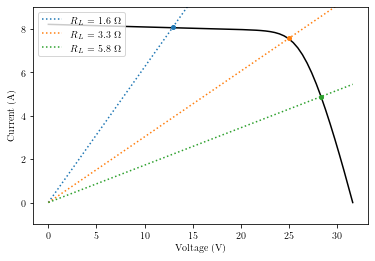

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel("Voltage (V)")
ax.set_ylabel("Current (A)")

ax.plot(uniform_curve.voltage, uniform_curve.current, '-k')

ax.plot(uniform_curve.voltage, r1_current, ':', label=f'$R_L$ = {r1:0.1f} $\Omega$')
ax.plot(uniform_curve.voltage, r2_current, ':', label=f'$R_L$ = {r2:0.1f} $\Omega$')
ax.plot(uniform_curve.voltage, r3_current, ':', label=f'$R_L$ = {r3:0.1f} $\Omega$')

ax.set_prop_cycle(None)

ax.plot(uniform_curve.voltage[r1_intersection], r1_current[r1_intersection], 'o', ms=4)
ax.plot(uniform_curve.voltage[r2_intersection], r2_current[r2_intersection], 'o', ms=4)
ax.plot(uniform_curve.voltage[r3_intersection], r3_current[r3_intersection], 'o', ms=4)

ax.set_ylim(top=max(uniform_curve.current)*1.1)

ax.legend(loc='upper left')

fig.savefig(r'output/fig_06a_curve_iv_r.pdf', bbox_inches='tight')

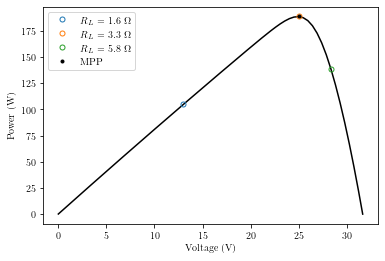

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel("Voltage (V)")
ax.set_ylabel("Power (W)")

power = pvsyss.power(uniform_curve.voltage, uniform_curve.current)
ax.plot(uniform_curve.voltage, power, '-k')

ax.set_prop_cycle(None)

ax.plot(uniform_curve.voltage[r1_intersection], r1_current[r1_intersection] * uniform_curve.voltage[r1_intersection], 'o', ms=5, markerfacecolor="None", label=f'$R_L$ = {r1:0.1f} $\Omega$')
ax.plot(uniform_curve.voltage[r2_intersection], r2_current[r2_intersection] * uniform_curve.voltage[r2_intersection], 'o', ms=5, markerfacecolor="None", label=f'$R_L$ = {r2:0.1f} $\Omega$')
ax.plot(uniform_curve.voltage[r3_intersection], r3_current[r3_intersection] * uniform_curve.voltage[r3_intersection], 'o', ms=5, markerfacecolor="None", label=f'$R_L$ = {r3:0.1f} $\Omega$')

ax.plot(uniform_curve.voltage[r2_intersection], r2_current[r2_intersection] * uniform_curve.voltage[r2_intersection], 'ok', ms=3, label='MPP')
# ax.set_ylim(top=max(uniform_curve.current)*1.2)

ax.legend(loc='upper left')

fig.savefig(r'output/fig_06b_curve_pv_r.pdf', bbox_inches='tight')
# fig.savefig('temp2.pdf', bbox_inches='tight')